In [4]:
# Import the module
import importlib
import IsovizPy as ja
import pandas as pd
import gffutils

In [21]:
# After making changes to IsovizPy, reload it (mostly for testing purposes)
importlib.reload(ja)

<module 'IsovizPy' from '/gpfs/commons/home/kisaev/Leaflet-private/src/visualization/IsovizPy.py'>

In [2]:
# Load data and create the database (note this may take 1-2 minutes - do this once!)
gtf_file = '/gpfs/commons/home/kisaev/gencode.v47.annotation.gtf'  
db = ja.create_db(gtf_file, "human_v47_gencode")

In [6]:
# Path to the database file created previously
db_path = "human_v47_gencode"

# Load the database
db = gffutils.FeatureDB(db_path, keep_order=True)

In [7]:
# Define the junctions and target format for conversion
junctions = [
    ("chr6", 41159882, 41161262, "-"),
    ("chr6", 41159882, 41163042, "-"),
    ("chr6", 41161613, 41163042, "-")
]

# If you have usage ratios, you can also specify those here otherwise, make a column in data called "usage_ratio" and make all values 0 to turn off this functionality 
usage_ratios = [51.7128896529883, 6.08062253992671, 42.206487807085]

# Adjust the 'usage_ratio' values to be rounded to the nearest whole number for percentage format
data = {
    'junction_id': [f"{chrom}_{start}_{end}_{strand}" for chrom, start, end, strand in junctions],
    'Cluster': [55951] * len(junctions),  # Assign all to a single cluster for simplicity
    'usage_ratio': [round(ratio) for ratio in usage_ratios]  # Round to the nearest whole number
}

In [8]:
splice_adata_var = pd.DataFrame(data)
print(splice_adata_var)

                junction_id  Cluster  usage_ratio
0  chr6_41159882_41161262_-    55951           52
1  chr6_41159882_41163042_-    55951            6
2  chr6_41161613_41163042_-    55951           42


In [9]:
# Convert junction_ids to format that can easily be overlapped with transcript coordinates stored in our database 
splice_junctions = ja.convert_junction_ids(splice_adata_var)
print(splice_junctions)

[{'chrom': 'chr6', 'start': 41159882, 'end': 41161262, 'name': 'junction_1', 'strand': '-', 'usage_ratio': 52}, {'chrom': 'chr6', 'start': 41159882, 'end': 41163042, 'name': 'junction_2', 'strand': '-', 'usage_ratio': 6}, {'chrom': 'chr6', 'start': 41161613, 'end': 41163042, 'name': 'junction_3', 'strand': '-', 'usage_ratio': 42}]


In [10]:
# Check junction annotations
junction_annotation_results = ja.check_junction_annotation(splice_junctions, db)
print(junction_annotation_results)

# Extract unique transcript IDs from junction_labels
unique_transcripts = list({transcript for label in junction_annotation_results for transcript in label['transcripts']})
print(unique_transcripts)

100%|██████████| 3/3 [00:00<00:00, 67.94it/s]

[{'junction': 'chr6:41159882-41161262', 'strand': '-', 'label_5_prime': "annotated on 5'", 'label_3_prime': "annotated on 3'", 'position_off_5_prime': 1, 'position_off_3_prime': 0, 'transcripts': ['ENST00000373122.8', 'ENST00000373113.8', 'ENST00000338469.3']}, {'junction': 'chr6:41159882-41163042', 'strand': '-', 'label_5_prime': "annotated on 5'", 'label_3_prime': "annotated on 3'", 'position_off_5_prime': 1, 'position_off_3_prime': 0, 'transcripts': ['ENST00000373122.8', 'ENST00000373113.8', 'ENST00000338469.3']}, {'junction': 'chr6:41161613-41163042', 'strand': '-', 'label_5_prime': "annotated on 5'", 'label_3_prime': "annotated on 3'", 'position_off_5_prime': 1, 'position_off_3_prime': 0, 'transcripts': ['ENST00000373122.8', 'ENST00000373113.8', 'ENST00000338469.3']}]
['ENST00000373122.8', 'ENST00000373113.8', 'ENST00000338469.3']


In [11]:
# Fetch transcript exon coordinates and determine plot boundaries
transcript_data = ja.fetch_transcripts_and_annotations(db, unique_transcripts)

In [12]:
# Get start and end coordinates for our plot 
region_start, region_end = ja.determine_region_boundaries(splice_junctions)

In [13]:
# Optionally - confirm whether your splice junctions fully annotate to known exons on 5' or 3' side! 
ja.check_junction_annotation(splice_junctions, db)

100%|██████████| 3/3 [00:00<00:00, 75.32it/s]


[{'junction': 'chr6:41159882-41161262',
  'strand': '-',
  'label_5_prime': "annotated on 5'",
  'label_3_prime': "annotated on 3'",
  'position_off_5_prime': 1,
  'position_off_3_prime': 0,
  'transcripts': ['ENST00000373122.8',
   'ENST00000373113.8',
   'ENST00000338469.3']},
 {'junction': 'chr6:41159882-41163042',
  'strand': '-',
  'label_5_prime': "annotated on 5'",
  'label_3_prime': "annotated on 3'",
  'position_off_5_prime': 1,
  'position_off_3_prime': 0,
  'transcripts': ['ENST00000373122.8',
   'ENST00000373113.8',
   'ENST00000338469.3']},
 {'junction': 'chr6:41161613-41163042',
  'strand': '-',
  'label_5_prime': "annotated on 5'",
  'label_3_prime': "annotated on 3'",
  'position_off_5_prime': 1,
  'position_off_3_prime': 0,
  'transcripts': ['ENST00000373122.8',
   'ENST00000373113.8',
   'ENST00000338469.3']}]

Plot saved to TREM2_no_usage_no_lines_20241104.pdf!


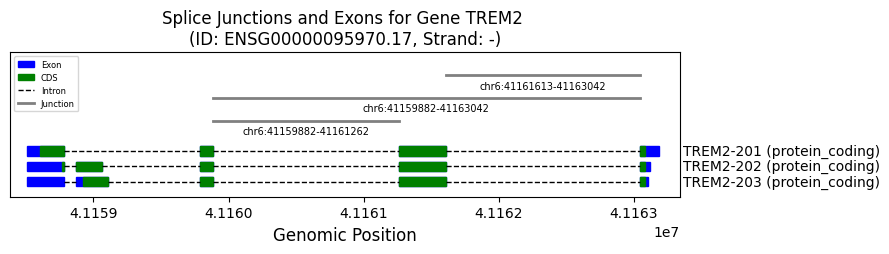

In [27]:
# Plot the annotations and splice junctions
ja.plot_exons_and_junctions(db, transcript_data, splice_junctions, region_start-500, region_end-700, base_width=9, trans_height=0.5, show_usage=False, show_junc_lines=False)

Plot saved to TREM2_no_usage_lines_20241104.pdf!


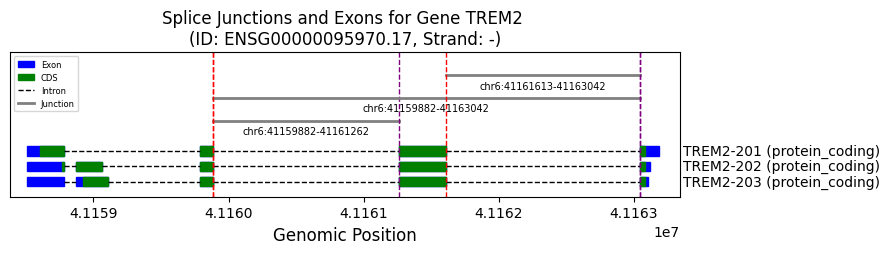

In [30]:
# Plot the annotations and splice junctions
ja.plot_exons_and_junctions(db, transcript_data, splice_junctions, region_start-500, region_end-700, base_width=9, trans_height=0.5, show_usage=False, show_junc_lines=True)

Plot saved to TREM2_usage_no_lines_20241104.pdf!


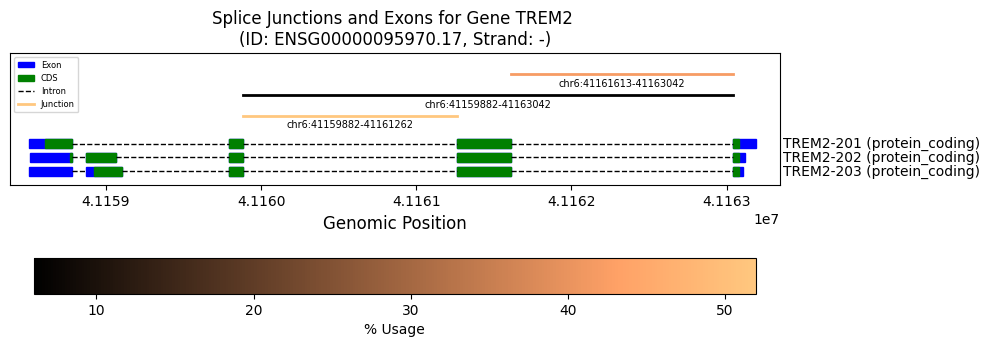

In [28]:
# Plot the annotations and splice junctions
ja.plot_exons_and_junctions(db, transcript_data, splice_junctions, region_start-500, region_end-700, base_width=10, trans_height=0.8, show_usage=True, colorbar_pad=0.3 ,show_junc_lines=False)

Plot saved to TREM2_usage_lines_20241104.pdf!


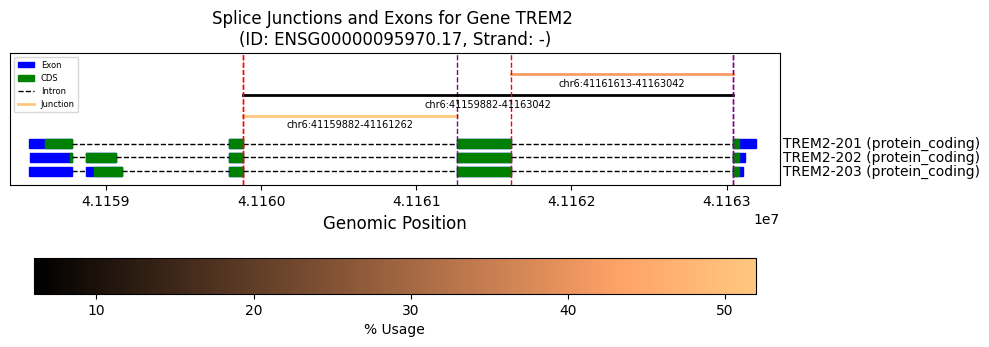

In [29]:
# Plot the annotations and splice junctions
ja.plot_exons_and_junctions(db, transcript_data, splice_junctions, region_start-500, region_end-700, base_width=10, trans_height=0.8, show_usage=True, colorbar_pad=0.3 ,show_junc_lines=True)

#### If you just want to visualize all of TREM2 isoforms without any specific splice junctions you can do the following:

In [32]:
gene_name = "TREM2"

In [33]:
transcript_ids = ja.fetch_transcripts_for_gene(db, gene_name)

# Step 2: Fetch transcript annotations
transcript_data = ja.fetch_transcripts_and_annotations(db, transcript_ids)
    
# Step 3: Determine region boundaries
region_start, region_end = ja.determine_region_boundaries_from_transcripts(transcript_data)

Plot saved to TREM2_isoforms_plot_20241104.pdf!


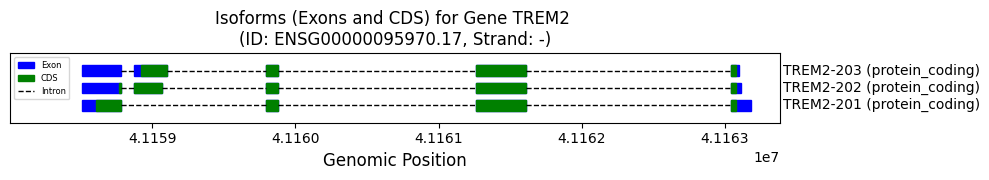

In [38]:
# Step 4: Plot isoforms
ja.plot_isoforms(db, transcript_data, region_start-500, region_end+200, base_width=10, trans_height=0.3)